In [3]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [4]:
def falso(banda1,banda2,banda3):
    img3 = cv2.merge((banda1,banda2,banda3))
    plt.figure(1)
    plt.imshow(img3)
    return img3

In [5]:
blue = cv2.imread('Landsat_C_02-11_B.png',cv2.IMREAD_GRAYSCALE)
green = cv2.imread('Landsat_C_03-11_G.png',cv2.IMREAD_GRAYSCALE)
red = cv2.imread('Landsat_C_04-11_R.png',cv2.IMREAD_GRAYSCALE)
nir = cv2.imread('Landsat_C_05-11_NIR.png',cv2.IMREAD_GRAYSCALE)

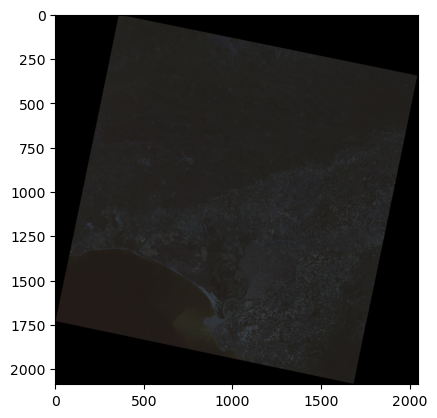

In [6]:
color_verdadero = falso(blue,green,red)
colorverdadero = cv2.cvtColor(color_verdadero,cv2.COLOR_BGR2RGB)

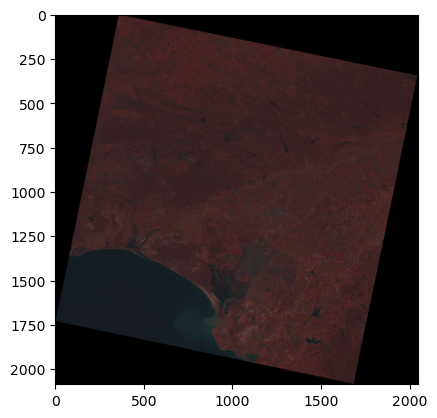

In [7]:
color_falso = falso(nir,green,blue)
colorfalso = cv2.cvtColor(color_falso,cv2.COLOR_BGR2RGB)

In [8]:
def calcular_histograma(img):
    histograma = np.zeros(256, dtype=int)
    for px in np.nditer(img):
        histograma[px] += 1
    return histograma

In [9]:
def expan (img, cmin, cmax):
    resimg = img.copy()
    ancho, alto = resimg.shape
    for x in range(ancho):
        for y in range(alto):
            px = resimg[x, y]
            if px <= cmin:
                resimg[x, y] = 0
            elif px >= cmax:
                resimg[x, y] = 255
            else:
                npx = (0+(px-cmin)*(255-cmin))/(cmax-cmin)
                resimg[x, y] = npx
    return resimg

In [10]:
def corte(img, porc):
    histograma = calcular_histograma(img)
    px_totales = img.size
    min_val = px_totales*porc
    max_val = px_totales*(1-porc)
    cmin = 0
    cmax = 0
    ac = 0
    for v in histograma:
        ac += v
        if ac <= min_val:
            cmin += 1
        if ac <= max_val:
            cmax += 1
    resimg = expan (img, cmin, cmax)
    return resimg

In [11]:
corte_RED = corte(red,0.01)
corte_GREEN = corte(green,0.01)
corte_BLUE = corte(blue,0.01)
corte_NIR = corte(nir,0.01)

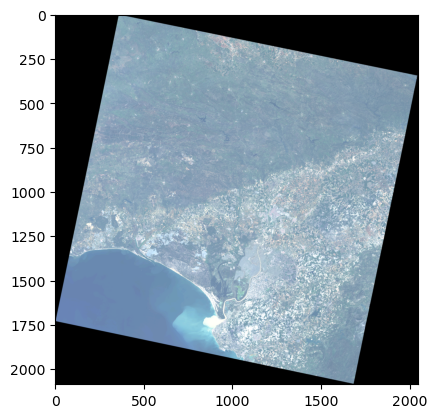

In [12]:
corte_verdadero = falso(corte_RED,corte_GREEN,corte_BLUE)
cortecolorverdadero = cv2.cvtColor(corte_verdadero,cv2.COLOR_BGR2RGB)

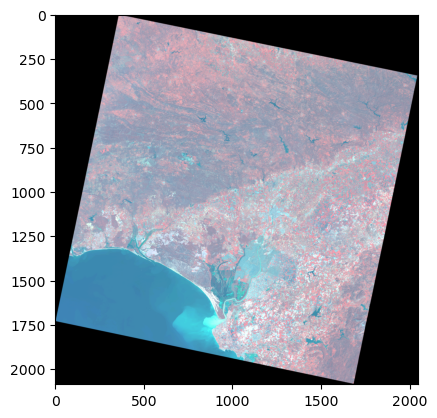

In [13]:
corte_falso = falso(corte_NIR,corte_GREEN,corte_BLUE)
cortecolorfalso = cv2.cvtColor(corte_falso,cv2.COLOR_BGR2RGB)

In [14]:
#Ejercicio 2

In [15]:
def seudo(img,minimo,maximo):
    resimg = img.copy()
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    
    fila,columna = resimg.shape
    
    for i in range(fila):
        for j in range(columna):
            ND = resimg[i,j]
            if maximo > ND > minimo:
                img [i,j]=[255,0,0]
    plt.imshow(img)
    plt.show()

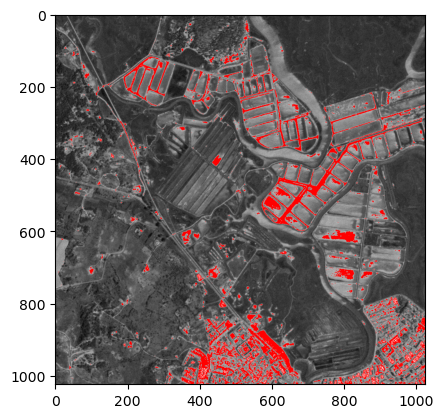

In [16]:
img = cv2.imread('ISS_Spain_IslaCristina_monobanda.jpg',cv2.IMREAD_GRAYSCALE)
seudo(img,180,255)

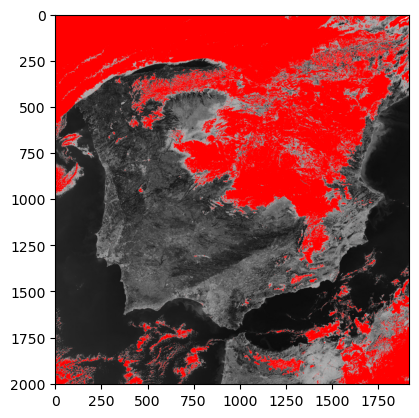

In [17]:
#Resalto de las nubes en la imagen de filomena
img = cv2.imread('Filomena.jpg',cv2.IMREAD_GRAYSCALE)
seudo(img,180,255)

In [18]:
#Ejercicio 3

In [19]:
def ndvi(nir,red):
    ndvi_res = np.zeros((red.shape[0], red.shape[1]), np.uint8)
    fila,columna = red.shape
    for i in range(fila):
        for j in range(columna):
            formula_aux= (nir[i,j] - red[i,j]) / (nir[i,j] + red[i,j])
            if nir[i,j] + red[i,j] == 0:
                ndvi_res[i,j] = 0
            else:
                ndvi_res[i,j] = (formula_aux+1)*127+1
    return ndvi_res

C:\Users\Carlosim\AppData\Local\Temp\ipykernel_2580\3752734535.py:6: RuntimeWarning: invalid value encountered in ubyte_scalars
  formula_aux= (nir[i,j] - red[i,j]) / (nir[i,j] + red[i,j])
C:\Users\Carlosim\AppData\Local\Temp\ipykernel_2580\3752734535.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  formula_aux= (nir[i,j] - red[i,j]) / (nir[i,j] + red[i,j])


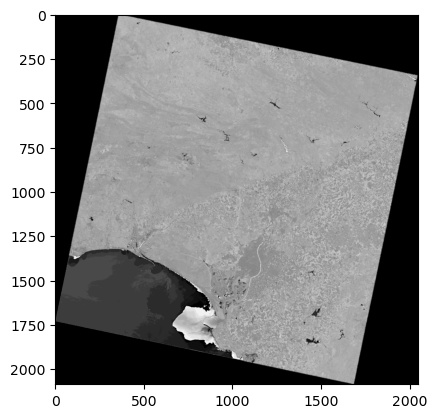

In [20]:
img_red = cv2.imread('Landsat_C_04-11_R.png',cv2.IMREAD_GRAYSCALE)
img_nir = cv2.imread('Landsat_C_05-11_NIR.png',cv2.IMREAD_GRAYSCALE)
img_ndvi = ndvi(img_nir,img_red)
plt.imshow(img_ndvi, cmap='gray')
plt.show()

In [23]:
def densi(img):
    densi_res = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
    fila,columna = red.shape
    for i in range(fila):
        for j in range(columna):
            ND = img[i,j]
            if ND < 128:
                densi_res[i,j]= [0,0,0]
            elif ND < 140:
                densi_res[i,j]= [100,100,100]
            elif ND < 150:
                densi_res[i,j]= [255,255,0]
            elif ND < 160:
                densi_res[i,j]= [255,0,0]
            elif ND < 170:
                densi_res[i,j]= [0,255,0]
            elif ND < 180:
                densi_res[i,j]= [255,0,255]
            elif ND < 192:
                densi_res[i,j]= [0,0,255]
            else:
                densi_res[i,j]= [255,255,255]
    return densi_res

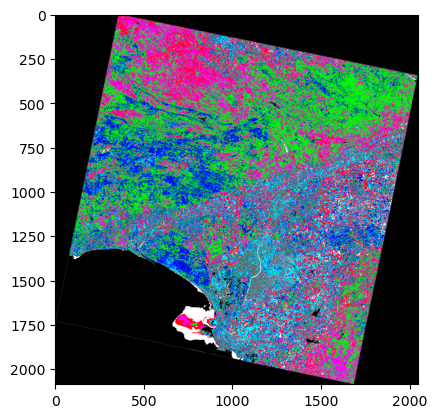

In [24]:
plt.imshow(cv2.cvtColor(densi(img_ndvi),cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
def cortehsv(img):
    resimg = img.copy()
    hsv = cv2.cvtColor(resimg,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    
    corte_s = corte(s, 0.01)
    corte_v = corte(v, 0.01)

    resimg1 = cv2.merge((h,corte_s,corte_v))
    resimg2 = cv2.merge((h,s,corte_v))
    resimg3 = cv2.merge((h,corte_s,v))
    
    resimg1 = cv2.cvtColor(resimg1,cv2.COLOR_HSV2BGR)
    resimg2 = cv2.cvtColor(resimg2,cv2.COLOR_HSV2BGR)
    resimg3 = cv2.cvtColor(resimg3,cv2.COLOR_HSV2BGR)
    
    return resimg1, resimg2, resimg3

In [55]:
hsv, cortev, cortes = cortehsv(colorverdadero)

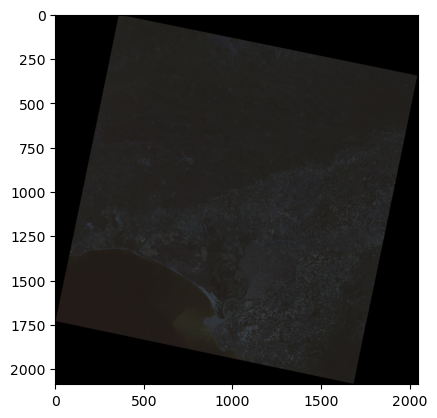

In [56]:
plt.imshow(cv2.cvtColor(colorverdadero, cv2.COLOR_BGR2RGB))

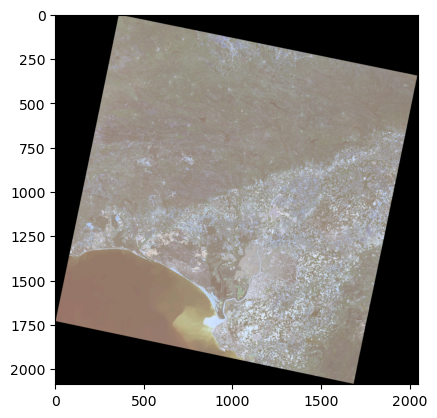

In [57]:
plt.imshow(cv2.cvtColor(cortev, cv2.COLOR_BGR2RGB))

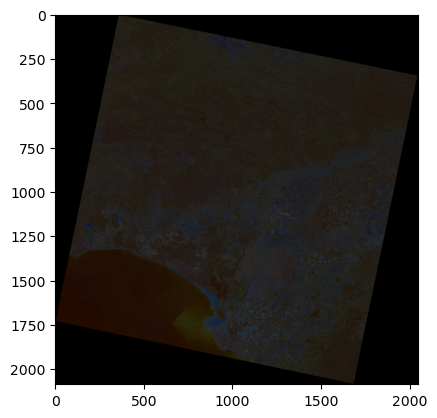

In [58]:
plt.imshow(cv2.cvtColor(cortes, cv2.COLOR_BGR2RGB))